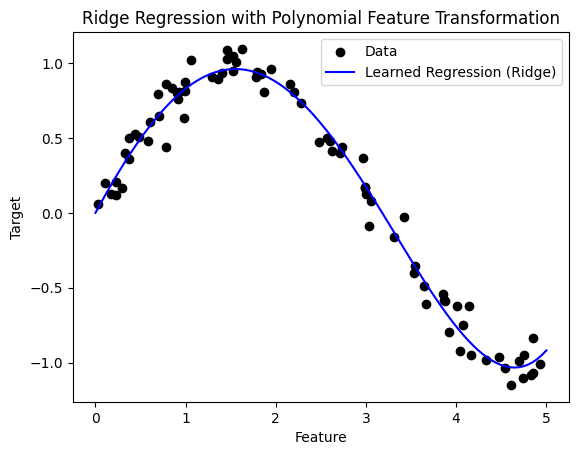

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data where the input-output relationship is non-linear
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(80)

# Define polynomial feature transformation function
def polynomial_features(X, degree):
    transformed_features = np.column_stack([X ** d for d in range(1, degree + 1)])
    return transformed_features

# Apply polynomial feature transformation
# With this transformation, we can apply linear model in the new feature space and still learn the nonlinear
# input-output relationship in the original feature space
degree = 4
X_transformed = polynomial_features(X, degree)

# Ridge Regression with Regularization parameter (lamb). Trying playing with this value to see what happens
lamb = 0.1
identity_matrix = np.eye(X_transformed.shape[1])
theta = np.linalg.inv(X_transformed.T @ X_transformed + lamb * identity_matrix) @ (X_transformed.T @ y)

# Predict using learned coefficients
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
X_test_transformed = polynomial_features(X_test, degree)
y_pred = X_test_transformed @ theta

# Plot the original data and the learned regression function
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test, y_pred, color='blue', label='Learned Regression (Ridge)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Ridge Regression with Polynomial Feature Transformation')
plt.legend()
plt.show()

# additional things to try: experiment with varying the degree and/or regularization hyperparam to see what happens